# Python OOP 基础

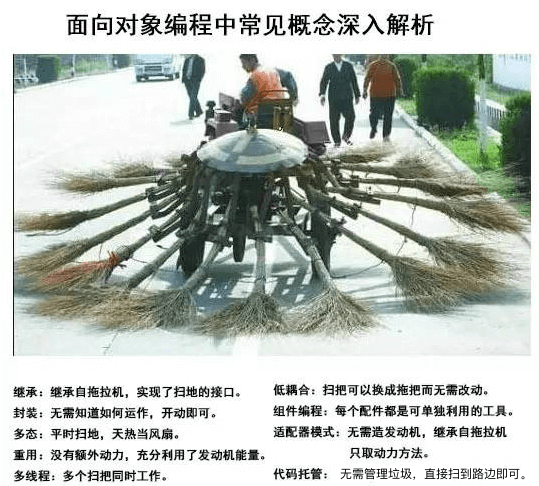

## 1. 类和实例对象 经典oop

class instance object

self代表了谁？代表的是实例本身

In [22]:
class Human():
    def __init__(self,name,gender):
        self.name = name
        self.gender = gender
    def callme(self):
        print("I'm {}, I'm a {}".format(self.name,self.gender))
    
    def __del__(self):
        print('i am die')

In [12]:
type(A)

__main__.Human

In [20]:
del A

In [21]:
del B

i am die


In [19]:
B=A

In [25]:
A=Human("shit","null")
A.callme()

I'm shit, I'm a null


In [3]:
A.name

'shit'

这里面\_\_init\_\_一般被称之为构造方法，对应的还有一个\_\_del\_\_的叫做析构方法

构造方法负责对外实现一个函数，这函数名字叫做类名Human，调用时候执行的就是\_\_init\_\_方法里面的语句

并且构造结束后返回一个实例（\_\_init\_\_函数里面并没有写return 但是实际上隐含了一句返回return self）

In [4]:
print(A.name)

shit


经典的面向对象语言要求属性的三种保护级别

* public公共级别 谁都能看 python中用name 无下划线开头表示
* protected保护级别 最好是子类看 传家宝留给孩子的 python中用_name 单下划线开头表示
* private私有级别 谁都不能看就自己实例私有 葛朗台 python中用__name 双下划线开头表示
* 还有一类特殊的变量或者函数 例如：`__init__ __name__`之类

In [4]:
class Car():
    def __init__(self,price,name):
        self.__price = price
        self._name = name
    def checkPrice(self):
        print(self.__price)

In [5]:
mycar = Car(1999999,'M3')

In [6]:
mycar.__price

AttributeError: 'Car' object has no attribute '__price'

In [17]:
mycar.checkPrice()

1999999


In [18]:
mycar.__price

AttributeError: 'Car' object has no attribute '__price'

其实不是真的不能访问，python只是把他改名

在其他语言比如java c++里面，私有变量是不可以在本实例self外访问的

In [7]:
mycar._Car__price

1999999

In [8]:
mycar._name

'M3'

可不可以给类弄一个属性？对于每个实例化的对象都管用的？

直接在class里面写就是类属性
* 类属性对于每个实例都管事 
* 如果实例写了个相同名字的实例属性 就覆盖了类属性了 小心不要乱起名字

In [51]:
class Foo():
    name = "foo"
    def __init__(self,name):
        self.name = name

F = Foo("Tom")
print(F.name) ## 这时候看到了实例化对象的属性
del F.name ## 实例化对象属性删掉了
print(F.name) ## 暴露出了类的属性
del F.name ##　不允许这么删　报错
print(F.name)

Tom
foo


AttributeError: name

## 类的继承

In [28]:
class Animal():
    def run(self):
        print("I'm running")

class Dog(Animal):
    pass
class Cat(Animal):
    pass

In [4]:
mydog = Dog()
mydog.run()

I'm running


In [29]:
class Dog(Animal):
    def run(self):
        print("dog is running")
class Cat(Animal):
    pass
mydog = Dog()
mycat = Cat()
mydog.run()
mycat.run()

dog is running
I'm running


有个爹的好处

In [34]:
def run_n_times(Animal,n):
    for i in range(0,n):
        Animal.run()
        
# run_n_times(mydog,1)
# run_n_times(mycat,2)
# run_n_times(Animal(),3)
run_n_times(Dog(),4)

dog is running
dog is running
dog is running
dog is running


所有人必须都有个run方法才可以，Cat没有run方法，但是Animal爹有，也成

这叫做对于扩展开放 可以随便让Animal生孩子

但是对于修改封闭 不需要修改run_n_times函数

In [35]:
class Bird():
    def run(self):
        print("run you")
        
mybird = Bird()
run_n_times(mybird,3)

run you
run you
run you


为啥不是animal类的孩子也可以用run_n_times这个函数？？？

python是动态语言 不会像java一样去严格检查输入参数的类型

就看有没有run方法 有就直接执行 管你是谁的儿子

长得像鸭子就是鸭子 不会判别DNA

参照4.1函数定义 什么都能传进来 但是传进来的实例必须能这么操作才可以

## 多重继承

父类super

In [1]:
class Animal():
    def run(self):
        print("I'm running")

class Dog(Animal):
    def run(self):
        super().run()                              #super()  代表了父类实例
        print("dog is running")
class Cat(Animal):
    pass
mydog = Dog()
mycat = Cat()
mydog.run()
mycat.run()

I'm running
dog is running
I'm running


In [2]:
class A:
    def add(self, x):
        y = x+1
        print(y)
class B(A):
    def add(self, x):
        super().add(x)
b = B()
b.add(2)  # 3

3


In [5]:
class Animal(object):
    def __init__(self, name):
        self.name = name
    def greet(self):
        print ('Hello, I am %s.' % self.name)

class Dog(Animal):
    def greet(self):
        super(Dog, self).greet()   # Python3 可使用 super().greet()
        print ('WangWang...')

In [6]:
dog = Dog('dog')
dog.greet()

Hello, I am dog.
WangWang...


super 的一个最常见用法可以说是在子类中调用父类的初始化方法

In [7]:
class Base(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

class A(Base):
    def __init__(self, a, b, c):
        super(A, self).__init__(a, b)  # Python3 可使用 super().__init__(a, b)
        self.c = c

深入super 其实super和父类没有必然关联 只是代表了上级

In [9]:
class Base(object):
    def __init__(self):
        print ("enter Base")
        print ("leave Base")

class A(Base):
    def __init__(self):
        print( "enter A")
        super(A, self).__init__()
        print( "leave A")

class B(Base):
    def __init__(self):
        print( "enter B")
        super(B, self).__init__()
        print( "leave B")

class C(A, B):
    def __init__(self):
        print( "enter C")
        super(C, self).__init__()
        print( "leave C")

      Base
      /  \
     /    \
    A      B
     \    /
      \  /
       C

In [10]:
c = C()

enter C
enter A
enter B
enter Base
leave Base
leave B
leave A
leave C


方法解析顺序（Method Resolution Order, MRO）

In [11]:
C.mro()   # or C.__mro__ or C().__class__.mro()

[__main__.C, __main__.A, __main__.B, __main__.Base, object]

一个类的 MRO 列表就是合并所有父类的 MRO 列表

In [12]:
def super(cls, inst):
    mro = inst.__class__.mro()
    return mro[mro.index(cls) + 1]

In [13]:
super(C, self).__init__()

NameError: name 'self' is not defined

## 2. 关于类本身的判断和内省

类型判断的两个方法 type和isinstance
* type 不会认为子类是一种父类
* isinstance 认为子类也是一种父类 会往继承树上游搜索

In [36]:
type(1)

int

In [2]:
class A():
    pass
class B(A):
    pass
class C(B):
    pass

b = B()
print(isinstance(b,A))
print(isinstance(b,B))
print(isinstance(b,C))

True
True
False


In [7]:
print(type(b))
print(type(b) == B)
print(type(b) == A)
B.__name__

<class '__main__.B'>
True
False


'B'

type实际上返回的是一个类型 type

In [8]:
type(Animal)

type

In [38]:
type(5)

int

In [37]:
type(int)

type

In [9]:
type(type(5))

type

In [10]:
type(abs)

builtin_function_or_method

In [12]:
type(str)

type

In [13]:
type('dad')==str

True

In [14]:
import types
type(Animal.run)

function

In [15]:
type(lambda x: x)

function

In [16]:
type(lambda x: x).__name__

'function'

python常见内置基本类型名字有(只有类型有__name__ 实例是没有名字的)：

int，float，bool，complex，str(字符串)，list，dict(字典)，set，tuple

In [9]:
type(5).__name__

'int'

In [17]:
dir(type(lambda x: x))

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

## 内省

In [29]:
class MyObject(object):
    '''
    d
    d
    
    '''
    def __init__(self):
        self.x = 9
    def power(self):
        return self.x * self.x

obj = MyObject()

In [23]:
dir(obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'power',
 'x',
 'y']

In [24]:
obj.__getattribute__

<method-wrapper '__getattribute__' of MyObject object at 0x7f891c738828>

In [25]:
obj.__getattribute__('x')

9

In [26]:
obj.__dir__()

['x',
 'y',
 '__module__',
 '__init__',
 'power',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [31]:
help(obj)

Help on MyObject in module __main__ object:

class MyObject(builtins.object)
 |  d
 |  d
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  power(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [35]:
obj.__doc__

'\n    d\n    d\n    \n    '

In [36]:
print(obj.__doc__)


    d
    d
    
    


In [38]:
obj.__str__()

'<__main__.MyObject object at 0x7f891c6ab4e0>'

In [40]:
obj.power()

81

In [43]:
repr(obj)

'<__main__.MyObject object at 0x7f891c6ab4e0>'

In [19]:
hasattr(obj, 'x')

True

In [20]:
setattr(obj, 'y', 19)

In [21]:
getattr(obj, 'y')

19

In [22]:
obj.y

19

## 3.  动态添加类和实例的属性和方法

In [39]:
class A():
    pass

a = A()
aa = A()



i am die


### 修改实例

* 给实例a动态绑定属性

In [44]:
a.name = "Tom"
print(a.name)
#print(aa.name)

Tom


In [41]:
aa.name

AttributeError: 'A' object has no attribute 'name'

* NONONO给实例a动态绑定方法(不常用 所以写法麻烦一些 为啥不开个新的类写继承呢)

In [45]:
def set_age(self,age):
    self.age = age


In [46]:
a.set_age(99)

AttributeError: 'A' object has no attribute 'set_age'

In [47]:
def set_age(self,age):
    self.age = age

from types import MethodType
a.set_age = MethodType(set_age, a)   # 强制转化为了MethodType
a.set_age(99)
print(a.age)
#print(aa.set_age())

99


### 修改类型

* 给类型A动态绑定属性

In [46]:
A.classname = "old_Wang"
print(a.classname) #通过实例访问
print(aa.classname) #另一个实例访问
print(A.classname) #直接从类访问

old_Wang
old_Wang
old_Wang


* 给类型A动态绑定方法 （注意比给实例添加来的方便不少 说明这是建议的用法）

In [49]:
def set_score(self,score):
    self.score = score
    
A.xxx = set_score
a.xxx(100)
aa.xxx(60)
print(a.score)
print(aa.score)

100
60


In [50]:
int.ddd = 100

TypeError: can't set attributes of built-in/extension type 'int'

扩展：python提供一个\_\_slots\_\_属性可以规定每个类可以动态添加什么属性和方法 用来限制随意添加

In [ ]:
class Student(object):
    __slots__ = ('name', 'age') # 用tuple定义允许绑定的属性名称 元组很合适

In [49]:
s = Student()
s.score = 99

AttributeError: 'Student' object has no attribute 'score'

继承的子类如果不写slot，就没有继承slot

In [50]:
class GraduateStudent(Student):
    pass

In [51]:
ss = GraduateStudent()
ss.score = 99

继承的子类如果写了slot，就悄悄继承父类的slot

In [54]:
class GraduateStudent1(Student):
    __slots__ = ('score', )

In [55]:
sss = GraduateStudent1()
sss.score = 99

In [56]:
sss.name = 'dd'

## 4. 属性的完全体

使用property方法制造一个可以拥有更复杂行为get set del的属性x（get set del顺序不可变） 例如想通过该方法顺道访问一下数据库

In [27]:
class C(object):
    def __init__(self):
        self._x = None
 
    def getx(self):
        return self._x
 
    def setx(self, value):
        self._x = value
 
    def delx(self):
        del self._x
 
    x = property(getx, setx, delx, "I'm the 'x' property.")#把三个方法注册一下

In [25]:
c = C()
c.x = 15
print(c.x)

15


In [26]:
help(c)

Help on C in module __main__ object:

class C(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  delx(self)
 |  
 |  getx(self)
 |  
 |  setx(self, value)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  x
 |      I'm the 'x' property.



简化的写法是用装饰器

In [28]:
class C(object):
    def __init__(self):
        self._x = None
 
    @property
    def x(self):                          # property装饰器对应get方法
        """I'm the 'x' property."""
        return self._x
 
    @x.setter                             # x.setter装饰器对应set方法
    def x(self, value):
        self._x = value
 
    @x.deleter                           # x.deleter装饰器对应del方法
    def x(self):
        del self._x

In [29]:
c = C()
c.x = 15
print(c.x)

15


我们不禁要问：这样用二向箔攻击类方法有个毛用？

因为属性太简单了 比如要加一个对于x的判断 光用属性办不到

可以做一个判断x是否在我们规定区间内的方法 然后把它坍缩成为属性 开心快乐

In [59]:
class C(object):
    def __init__(self):
        self._x = None
 
    @property
    def x(self):                          # property装饰器对应get方法
        """I'm the 'x' property."""
        return self._x
 
    @x.setter                             # x.setter装饰器对应set方法
    def x(self, value):
        if value>0 and value<100:
            self._x = value
        else:
            print("you idiot",value,'out of range')
 
    @x.deleter                           # x.deleter装饰器对应del方法
    def x(self):
        del self._x

In [60]:
c = C()
c.x = 15
print(c.x)
c.x = 1000

15
you idiot 1000 out of range


## 5. 方法的完全体 

* 实例方法 普通的方法 用self传参指向实例对象自己——自己的方法
* 类方法 属于类本身的方法 用cls传参指向类型——家庭的方法
* 静态方法 属于全世界的方法 就放在类里面而已——人类的方法

In [22]:
worldname = "earth"

class A():
    claname = "A"     # 类变量
    claage = 19
    def __init__(self,name):    # 构造函数
        self.name = name
    def askname(self):
        print("my name is: "+self.name+". I came from:"+self.claname)
    
    @classmethod
    def askfrom(cls):
        print(cls.claname)
    
    @staticmethod
    def askworld():
        print(worldname)

In [25]:
a = A("Tom")

a.askname()   # 实例调用实例方法
a.askfrom()   # 实例访问类方法
a.askworld()  # 实例访问静态方法  
# 实例啥都能干 实例碉堡了

A.askfrom()   # 类访问类方法
A.askworld()  # 类访问静态方法
# 类就菜鸡了一些

my name is: Tom. I came from:A
A
earth
A
earth


##  * 魔术方法 不用点出来的方法

类和实例的有各类复杂行为 比如创造 销毁 计算长度 打印名称等等

这些行为有时候不能使用域访问符.来调用方法实现

比如实例化类的时候调用的\_\_init\_\_ 就没有使用点号来调用

魔术方法很多 这里举几个简单的例子

In [38]:
class Student(object):
    def __init__(self, name):  # __init__在实例化时候被默默地调用
        self.name = name     
    def __str__(self):   # __str__在print时候被默默地调用
        return 'Student object {}'.format(self.name)

In [39]:
oldwang = Student("oldwang")
print(oldwang)

Student object oldwang


In [57]:
class fibb:
    def __init__(self):
        self.prev = 0
        self.curr = 1
 
    def __iter__(self):   # __iter__在用iter()函数处理fibb实例f的时候 默默地被调用
        return self
 
    def __next__(self):  # __next__在用next()处理的fibb实例时候默默的被调用
        value = self.curr
        self.curr += self.prev
        self.prev = value
        return value

f = fibb()
g = iter(f)             # 返回一个迭代器
print(next(g))
print(next(g))
print(next(g))
print(next(g))

1
1
2
3


In [58]:
class A(object):
    def __init__(self, name):  
        self.name = name  
    def __call__(self):  # __call__把实例都做成了方法 可以直接调用实例
        print('My name is {}'.format(self.name))

a = A("TOM")
a()

My name is TOM


repr和str的区别

In [2]:
class A():
    def __repr__(self):
        return 'repr'       # repr目标是给解释器读取 
    def __str__(self): 
        return 'str'    　 # str的目标是给人类读取
    
a = A()

In [3]:
a

repr

In [4]:
print(a)

str


eval的使用思路有点绕   一般在处理其他文本中的数据时特别有效  例如在txt中写入python代码 with read读入之后 使用eval直接逐行执行 后续提供案例

In [6]:
s = 'abdcf'
eval('['+','.join([repr(i) for i in s])+']')    # 这里for从s中取出的i是一个字符  例如：b  这里repr（i）给该字符加上一层引号 "b"  可以直接和其他字符串拼接

['a', 'b', 'd', 'c', 'f']

## 6. 举例 构造一个矩阵类

In [1]:
class Matrix:
    
    def __init__(self, n_rows, m_cols, default_value=0):
        assert n_rows > 0
        assert m_cols > 0
        assert isinstance(default_value, (int, float, complex))
        self.rows = [[default_value ] * m_cols for i in range(n_rows)]      
    
    def dim(self):
        '''return tuple -> num of rows, num of cols'''
        return (len(self.rows), len(self.rows[0]))
    
    def __repr__(self):
        return 'Matrix: %d rows, %d cols\n' % self.dim() + str(self.rows[0])
   
    def __getitem__(self, ij): 
        '''ij is a tuple (i,j). Allows m[i,j] instead m[i][j]'''
        i,j = ij
        if isinstance(i, int) and isinstance(j, int):
            return self.rows[i][j]
        elif isinstance(i, slice) and isinstance(j, slice):
            M = Matrix(1,1) # to be overwritten
            M.rows = [row[j] for row in self.rows[i]]
            return M
        else:
            return NotImplemented
    
    def __setitem__(self, ij, val): 
        '''ij is a tuple (i,j). Allows m[i,j] instead m[i][j]'''
        i,j = ij
        if isinstance(i,int) and isinstance(j,int):
            assert isinstance(val, (int, float, complex))
            self.rows[i][j] = val
        elif isinstance(i,slice) and isinstance(j,slice):
            assert isinstance(val, Matrix)
            n,m = val.dim()
            s_rows = self.rows[i]
            assert len(s_rows) == n and len(s_rows[0][j]) == m
            for s_row, v_row in zip(s_rows,val.rows):
                s_row[j] = v_row
        else:
            return NotImplemented

    def __eq__(self, other):
        assert isinstance(other, Matrix)
        if self.dim() != other.dim():
            return False
        n,m = self.dim()
        for i in range(n):
            for j in range(m):
                if self[i,j] != other[i,j]:
                    return False
        return True
    
    def __add__(self, other):
        return self._entrywise_op(other, lambda x,y: x + y)
    
    def __sub__(self, other):
        return self._entrywise_op(other, lambda x,y: x - y)
    
    def __neg__(self):
        n,m = self.dim()
        return Matrix(n, m, 0) - self
    
    def _entrywise_op(self, other, op):
        '''pros each elements of matrix'''
        assert isinstance(other, Matrix)
        assert self.dim() == other.dim()
        n,m = self.dim()
        M = Matrix(n, m)
        for i in range(n):
            for j in range(m):
                M[i,j] = op(self[i,j], other[i,j])
        return M
    
    def __mul__(self, other):
        '''multilpy by scalar or another matrix'''
        if isinstance(other, (int,float,complex)):
            n,m = self.dim()
            M = Matrix(n, m, other)
            return self._entrywise_op(M, lambda x,y: x * y)
        elif isinstance(other, Matrix):
            n1,m1 = self.dim()
            n2,m2 = other.dim()
            assert m1 == n2
            M = Matrix(n1,m2)
            for i in range(n1):
                for j in range(m2):
                    M[i,j] = sum([self[i,k] * other[k,j] for k in range(m1)])
            return M
        else:
            return NotImplemented
    
    __rmul__ = __mul__
    
    def prettyprint(self):
        return str.join('\n',[str(row) for row in self.rows])
    
    def save(self, filename):
        '''save to file'''
        with open(filename, "w") as fout:
            fout.write(self.prettyprint())
    
    @staticmethod
    def load(filename):
        '''load from file'''
        rows = []
        with open(filename, 'r') as fin:
            for line in fin:
                line = line.strip()
                row = eval(line)
                rows.append(row)
        M = Matrix(1,1)
        M.rows = rows
        return M

In [2]:
A = Matrix(3,3,1)
B = Matrix(3,3,1) * 2.5
C = A - B
D = A + B
print(C.prettyprint())
D.save("tmp")
print(D == Matrix.load("tmp"))

[-1.5, -1.5, -1.5]
[-1.5, -1.5, -1.5]
[-1.5, -1.5, -1.5]
True
